In [1]:
## Libraries require to run the script for curvature calculation##
import numpy as np
import sympy as sp
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import math

In [2]:
## read the input files using pandas ##
data1 = pd.read_csv('../../TLCL2/large_system_OPLS_AA/analysis.trr-PTENS-TOT-mod.xvg', delim_whitespace=True, header=None, names= ["z", "pL"])

Average of the list = -2.32


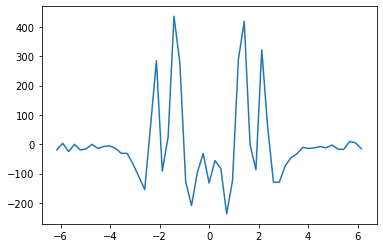

In [3]:
# select first column and make list
z = data1 ['z'].tolist()
# select second column and make list
pL = data1 ['pL'].tolist()
def Average(pL): 
    return sum(pL) / len(pL)
pN = Average(pL)
print("Average of the list =", round(pN, 2))
plt.plot(z, data1['pL'])

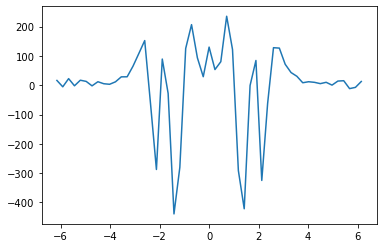

In [4]:
## plot the values ##
data1['pN-pL'] = pN - data1['pL']
data1['multi'] = data1['pN-pL'] * data1['z']
plt.plot(z, data1['pN-pL'])

In [5]:
## C0 values calculation using 6nm cutoff###
#z1 = df['z']
def Reverse(lst):
    new_lst = lst[::-1]
    return new_lst
A = data1['z'][0:27].tolist()
#print(Reverse(A))
z11 = Reverse(A)
#z11 = df['z'][0:48].tolist()
#z11.reverse()
z12 = data1['z'][26:].tolist()
# read two halfes from multi pz
B = data1['multi'] [0:27].tolist()
pz1 = Reverse(B)
pz2 = data1['multi'] [26:].tolist()
# define function w1 using lambda
w1 = lambda pz1 : pz1
from scipy import integrate
integ1 = np.trapz(w1(pz1), z11)
# define function w2 using lambda
w2 = lambda pz2 : pz2
from scipy import integrate
integ2 = np.trapz(w2(pz2), z12)
result = integ1 + integ2
print("final integration result two split:" '{}'.format (result))
kappa = 16.8879

final integration result two split:96.53964191989549


In [6]:
C_0 = result/(2*kappa*4.18*10)
print ("bilayer C_0 value for CAR(OPLS-AA) : " '{}'.format (C_0))

bilayer C_0 value for CAR(OPLS-AA) : 0.06837915938277564


In [8]:
delta=abs(integ1)-abs(integ2)
deltaC_0 = delta/(2*kappa*4.11*10)
print ("bilayer deltaC_0 value for CL-OPLS-AA : " '{}'.format (deltaC_0))

bilayer deltaC_0 value for CL-OPLS-AA : 0.01286163946689824


In [7]:
## Different method for delta C calculation##
# importing Statistics module
import statistics
# creating a simple data - set
sample = [0.4220, -0.0222, -0.01679, 0.1259]
##calculate SD
print("Standard Deviation of sample is % s "
                % (statistics.stdev(sample)))
##calculate mean 
print("Mean Value of CL C_0 (OPLS-AA) is % s "
                % (statistics.mean(sample)))

Standard Deviation of sample is 0.20813633919060523 
Mean Value of CL C_0 (OPLS-AA) is 0.1272275 
